In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_biclusters

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.linalg import norm

# Kernel Density Estimation

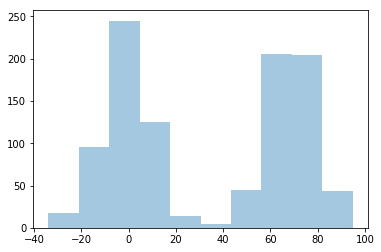

In [4]:
data =  make_biclusters((1000,1), 2, noise=10, random_state=31415)[0].ravel()
sns.distplot(data, kde=False)

In [5]:
def K(u): return np.all(np.abs(u) <= 1/2, axis=0)

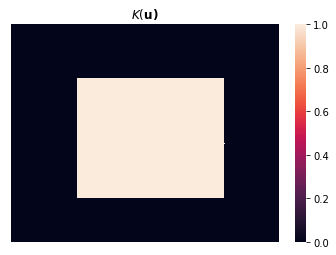

In [6]:
XG = np.mgrid[-1:1:0.1, -1:1:0.1]
sns.heatmap(np.apply_along_axis(K, 0, XG), xticklabels=False, yticklabels=False);
plt.title(r"$K(\bf{u})$");

In [500]:
def K(u, axis=0): return np.all(np.abs(u) <= 1/2, axis=axis)

def p1(x, X, h):
    """
    KDE under a unit hypercube
    """
    N, D = X.shape
    xden, _ = x.shape
    
    u = ((x - X.T) / h).reshape(D, xden, N)
    ku = K(u).sum(axis=1) / (N * h ** D)
    return ku

def kdeg(x, X, h):
    """
    KDE under a gaussian kernel
    """
    N, D = X.shape
    nden, _ = x.shape # number of density points
    
    Xhat = X.reshape(D, 1, N)
    xhat = x.reshape(D, nden, 1)
    u = xhat - Xhat
    u = norm(u, ord=2, axis=0) ** 2 / (2 * h ** 2) # (N, nden)
    px = np.exp(-u).sum(axis=1) / (N * h * np.sqrt(2 * np.pi))
    return px

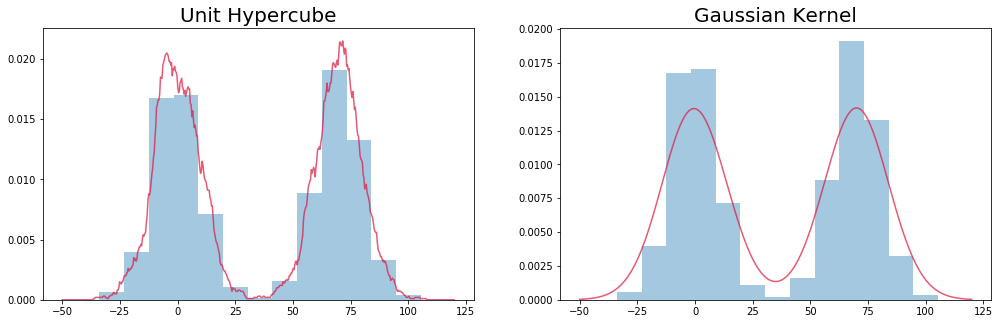

In [501]:
xv = np.linspace(-50, 120, 500).reshape(-1, 1)
data = data.reshape(-1, 1)

fig, ax = plt.subplots(1, 2, figsize=(17, 5))

sns.distplot(data, kde=False, norm_hist=True, ax=ax[0])
sns.distplot(data, kde=False, norm_hist=True, ax=ax[1])
ax[0].plot(xv, p1(xv, data, 5), c="crimson", alpha=0.7)
ax[1].plot(xv, kdeg(xv, data, 10), c="crimson", alpha=0.7)

ax[0].set_title("Unit Hypercube", size=20)
ax[1].set_title("Gaussian Kernel", size=20);

In [502]:
data =  make_biclusters((1000,2), 2, noise=10, random_state=31415)[0]
xv = np.mgrid[-40:100:0.5, -40:100:0.5]

In [541]:
xv1 = xv.T.reshape(-1, 2)

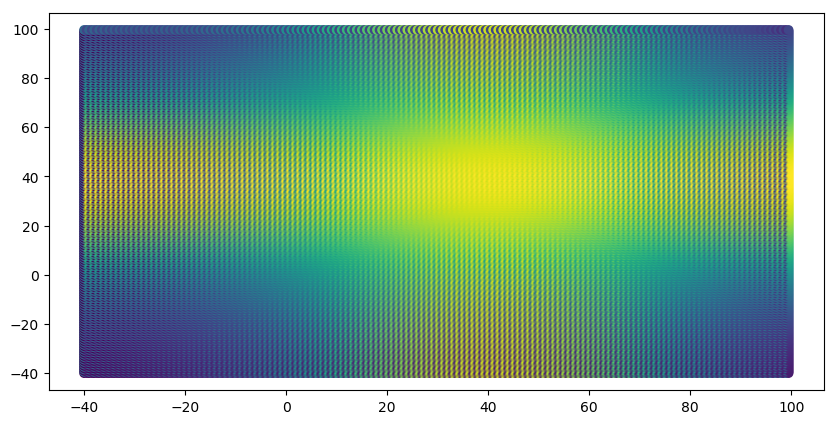

In [609]:
D = kdeg(xv1, data, 20)

plt.figure(figsize=(10, 5), dpi=100)
x,y,c=np.c_[xv1, D].T
plt.scatter(x, y, c=c)

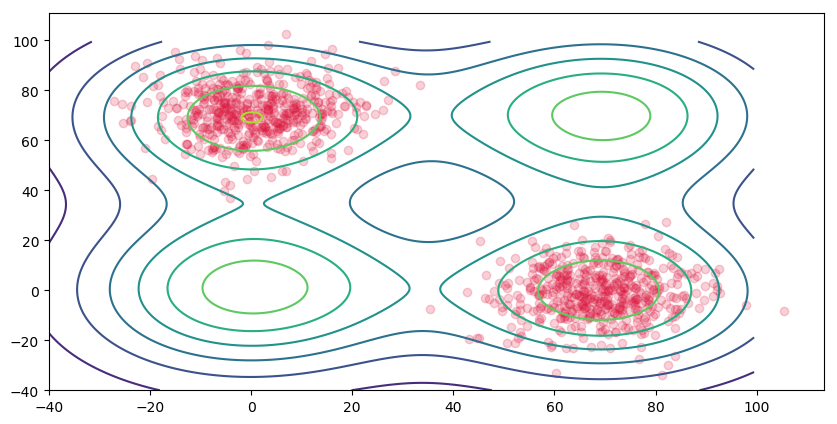

In [608]:
D = kdeg(xv.reshape(-1, 2), data, 20)

plt.figure(figsize=(10, 5), dpi=100)
plt.contour(*xv, D.reshape(280, 280))
plt.scatter(*data.T, alpha=0.2, c="crimson")